## Error

Out of the books different ways of measearing the estimation error of an estimator are supported.

In [8]:
from azcausal.core.parallelize import Joblib
from azcausal.data import CaliforniaProp99
from azcausal.estimators.panel.did import DID

panel = CaliforniaProp99().panel()

# initialize an estimator object, here difference in difference (did)
estimator = DID()

# run the estimator
result = estimator.fit(panel)

print(result.summary(percentage=False))

╭──────────────────────────────────────────────────────────────────────────────╮
|                                    Panel                                     |
|  Time Periods: 31 (19/12)                                  total (pre/post)  |
|  Units: 39 (38/1)                                       total (contr/treat)  |
├──────────────────────────────────────────────────────────────────────────────┤
|                                     ATT                                      |
|  Effect: -27.35                                                              |
|  Observed: 60.35                                                             |
|  Counter Factual: 87.70                                                      |
╰──────────────────────────────────────────────────────────────────────────────╯


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_error_distribution(runs):

    plt.subplots(1, 1, figsize=(12,2))
    x = np.array([result.effect.value for result in runs])
    plt.hist(x, bins=31, color='blue')
    plt.axvline(x.mean(), color='red')

    return x.mean(), x.std()

### Bootstrap

#### Random

╭──────────────────────────────────────────────────────────────────────────────╮
|                                    Panel                                     |
|  Time Periods: 31 (19/12)                                  total (pre/post)  |
|  Units: 39 (38/1)                                       total (contr/treat)  |
├──────────────────────────────────────────────────────────────────────────────┤
|                                     ATT                                      |
|  Effect (±SE): -27.35 (±2.7784)                                              |
|  Confidence Interval (95%): [-32.79 , -21.90]                           (-)  |
|  Observed: 60.35                                                             |
|  Counter Factual: 87.70                                                      |
╰──────────────────────────────────────────────────────────────────────────────╯


(-27.36749857346469, 2.7783971651161945)

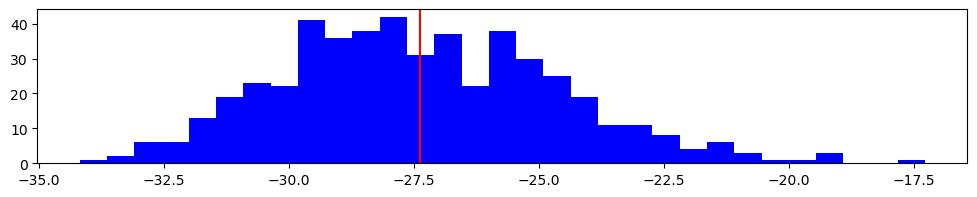

In [10]:
from azcausal.core.error import Bootstrap

method = Bootstrap(n_samples=500)
se, runs = method.run(result)

# print out information about the estimate
print(result.summary(percentage=False))

plot_error_distribution(runs)

#### Stratified

╭──────────────────────────────────────────────────────────────────────────────╮
|                                    Panel                                     |
|  Time Periods: 31 (19/12)                                  total (pre/post)  |
|  Units: 39 (38/1)                                       total (contr/treat)  |
├──────────────────────────────────────────────────────────────────────────────┤
|                                     ATT                                      |
|  Effect (±SE): -27.35 (±2.7462)                                              |
|  Confidence Interval (95%): [-32.73 , -21.97]                           (-)  |
|  Observed: 60.35                                                             |
|  Counter Factual: 87.70                                                      |
╰──────────────────────────────────────────────────────────────────────────────╯


(-27.444945386023104, 2.7462024179480418)

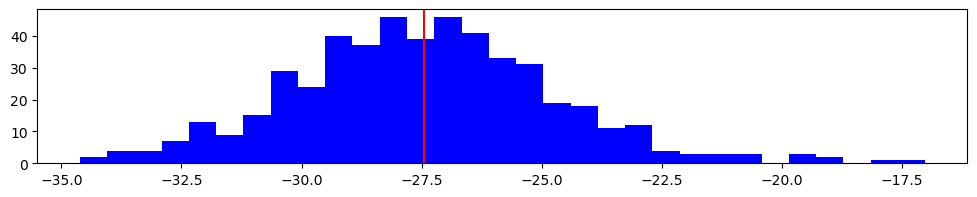

In [11]:
from azcausal.core.error import Bootstrap

method = Bootstrap(n_samples=500, mode='stratified')
se, runs = method.run(result)

# print out information about the estimate
print(result.summary(percentage=False))

plot_error_distribution(runs)

#### Bayes

╭──────────────────────────────────────────────────────────────────────────────╮
|                                    Panel                                     |
|  Time Periods: 31 (19/12)                                  total (pre/post)  |
|  Units: 39 (38/1)                                       total (contr/treat)  |
├──────────────────────────────────────────────────────────────────────────────┤
|                                     ATT                                      |
|  Effect (±SE): -27.35 (±0.230007)                                            |
|  Confidence Interval (95%): [-27.80 , -26.90]                           (-)  |
|  Observed: 60.35                                                             |
|  Counter Factual: 87.70                                                      |
╰──────────────────────────────────────────────────────────────────────────────╯


(-27.358925416584082, 0.2300065201466684)

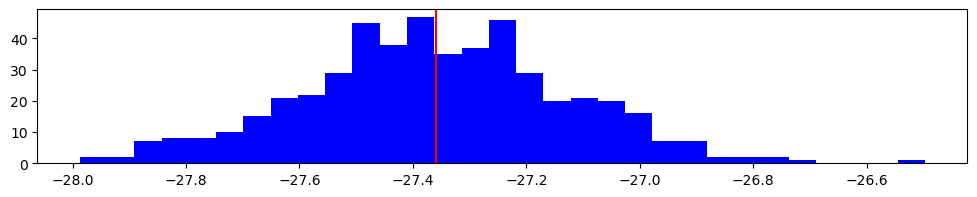

In [12]:
from azcausal.core.error import Bootstrap

method = Bootstrap(n_samples=500, mode='bayes', alpha=4.0)
se, runs = method.run(result)

# print out information about the estimate
print(result.summary(percentage=False))

plot_error_distribution(runs)

### Placebo

╭──────────────────────────────────────────────────────────────────────────────╮
|                                    Panel                                     |
|  Time Periods: 31 (19/12)                                  total (pre/post)  |
|  Units: 39 (38/1)                                       total (contr/treat)  |
├──────────────────────────────────────────────────────────────────────────────┤
|                                     ATT                                      |
|  Effect (±SE): -27.35 (±18.03)                                               |
|  Confidence Interval (95%): [-62.68 , 7.9826]                         (+/-)  |
|  Observed: 60.35                                                             |
|  Counter Factual: 87.70                                                      |
╰──────────────────────────────────────────────────────────────────────────────╯


(-0.7310601604338312, 18.02671870613764)

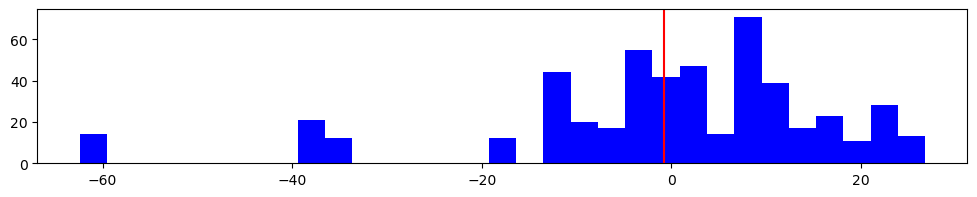

In [13]:
from azcausal.core.error import Placebo

method = Placebo(n_samples=500)
se, runs = method.run(result)

# print out information about the estimate
print(result.summary(percentage=False))

plot_error_distribution(runs)

### JackKnife

╭──────────────────────────────────────────────────────────────────────────────╮
|                                    Panel                                     |
|  Time Periods: 31 (19/12)                                  total (pre/post)  |
|  Units: 39 (38/1)                                       total (contr/treat)  |
├──────────────────────────────────────────────────────────────────────────────┤
|                                     ATT                                      |
|  Effect (±SE): -27.35 (±2.7671)                                              |
|  Confidence Interval (95%): [-32.77 , -21.93]                           (-)  |
|  Observed: 60.35                                                             |
|  Counter Factual: 87.70                                                      |
╰──────────────────────────────────────────────────────────────────────────────╯


(-27.349111083614964, 0.4549157915454204)

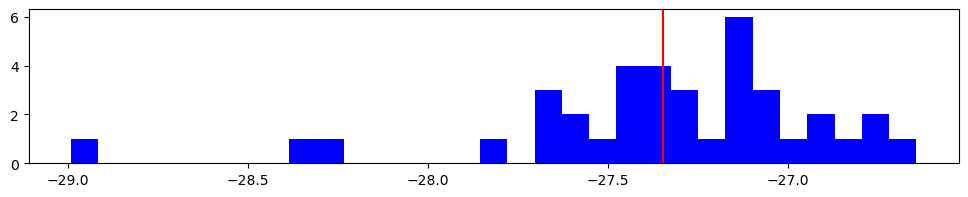

In [14]:
from azcausal.core.error import JackKnife

method = JackKnife()
se, runs = method.run(result)

# print out information about the estimate
print(result.summary(percentage=False))

plot_error_distribution(runs)